In [4]:
%load_ext autoreload
%autoreload 2

import parenclitic
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, SVG
import igraph

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
from configurations.load_data_down_GSE52588 import load_data_down_GSE52588_cpgs
from configurations.config_down_GSE52588_cpg import config

X, y, _, all_features_names = load_data_down_GSE52588_cpgs()

Data loaded:  61.73786425800017
float32 (422801, 87)
(87, 422801)
(87, 422801) 150253 (87,) (422801,)


In [5]:
from annotations.cpgs import cpgs_annotation
cpgs = cpgs_annotation(config.ifname('cpgs_annotations'))
#cur = cpgs.get_sub_frame({'chr_in': ['22'], 'geotype_ex': ['Island']})
#df = cpgs.get_cpgs({'chr_in': ['22'], 'geotype_ex': ['Island']})
cpgs_names, _ = cpgs.get_cpgs({'gene_out': ['PFN3', 'LOXL2', 'HOXA2', 'MIR219-2', 'DLL1']})
cpgs_ids = np.array([y for x in cpgs_names for y in np.flatnonzero(all_features_names == x).tolist()])

In [9]:
Xq = X[:, cpgs_ids]
sub_subjects = config.params["mongoloids_mask"].value
Xc = Xc[sub_subjects, :]
Yc = y[sub_subjects]
features_names = all_features_names[cpgs_ids]

In [7]:
num_samples = Xc.shape[0]
num_features = Xc.shape[1]

mask = np.array(Yc, np.bool)
mask[:] = 1

clf = parenclitic.parenclitic(kernel = parenclitic.pdf_kernel(thr_p = 0.12))
clf.fit(Xc, Yc, mask, )
clf.calc_parenclitic()
gr = clf.get_graphs(features_names = features_names)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


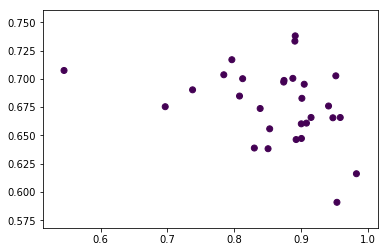

In [8]:
plt.scatter(Xq[:, 0], Xq[:, 1], c = mask)

4 5 4 58 42 0 4 0 0 2 1 1 2 0 42 0 1 0 4 1 3 2 2 51 19 82 37 37 2 

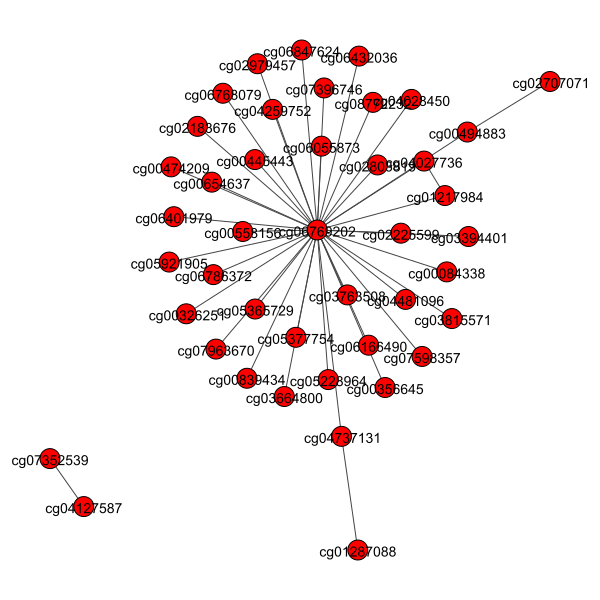

In [10]:
for g in gr:
    print(g.ecount(), end=' ')
visual_style = {}
visual_style["bbox"] = (600, 600)
visual_style["margin"] = 50
gc = gr[4].copy()
gc.delete_vertices([v.index for v in gc.vs if v.degree() == 0])
gc.vs["label"] = features_names
visual_style["label"] = gc.vs["label"]
p = igraph.plot(gc, **visual_style)
display(SVG(p._repr_svg_()))

In [138]:
grs = gr.copy()
#grd = gr.copy()
    

In [141]:
pard = clf.get_parenclitic()
print (type(par))
print (par.shape)
print (parenclitic.parenclitic.metric_names())
print (par.head())

<class 'pandas.core.frame.DataFrame'>
(29, 40)
{'degrees': 'Degrees', 'min_degrees': 'Min degrees', 'max_degrees': 'Max degrees', 'mean_degrees': 'Mean degrees', 'std_degrees': 'Std degrees', 'efficiency': 'Efficiency', 'betweenness': 'Betweenness', 'min_betweenness': 'Min betweenness', 'max_betweenness': 'Max betweenness', 'mean_betweenness': 'Mean betweenness', 'std_betweenness': 'Std betweenness', 'closeness': 'Closeness', 'min_closeness': 'Min closeness', 'max_closeness': 'Max closeness', 'mean_closeness': 'Mean closeness', 'std_closeness': 'Std closeness', 'pagerank': 'Pagerank', 'min_pagerank': 'Min pagerank', 'max_pagerank': 'Max pagerank', 'mean_pagerank': 'Mean pagerank', 'std_pagerank': 'Std pagerank', 'eigenvalues': 'Eigenvalues', 'min_eigenvector_centrality': 'Min eigenvector centrality', 'max_eigenvector_centrality': 'Max eigenvector centrality', 'mean_eigenvector_centrality': 'Mean eigenvector centrality', 'std_eigenvector_centrality': 'Std eigenvector centrality', 'num_e

In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
par_numeric = par.select_dtypes(include=numerics)
print (par_numeric.head())

   efficiency   max_IPR  max_betweenness  max_closeness  max_degrees  \
0   12.785207  0.704458            177.0       3.332507    42.018580   
1    0.000000  1.000000              0.0       0.033333     0.000000   
2    3.668922  0.500000             33.0       0.060284     3.189633   
3    6.396413  0.650000            102.0       4.238327    31.636519   
4    1.450383  0.500000             27.0       0.053510     3.049204   

   max_eigenvector_centrality  max_pagerank  max_weights  mean_IPR  \
0                         1.0      0.039119     2.573403  0.321016   
1                         1.0      0.033333          NaN  1.000000   
2                         1.0      0.110202     0.474736  0.278776   
3                         1.0      0.039142     1.638885  0.300922   
4                         1.0      0.169275     0.574375  0.299838   

   mean_betweenness  ...  min_weights  num_edges  robustness  std_betweenness  \
0         21.933333  ...     0.000443        364          19     

In [143]:
import pandas as pd
pars["subject"] = "Siblings"
pard["subject"] = "DS"
par = pd.concat([pars, pard])

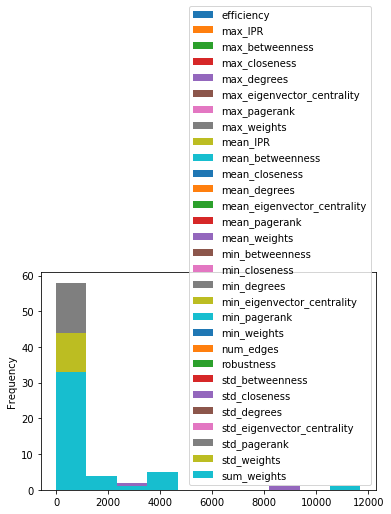

In [146]:
par.plot.hist()

# Subset gene pairs for parenclitic

In [13]:
from graphs_aux import *
data = get_graph_file(config, id_thr = 0, id_sample = 0)
IDS = data['IDS']
print(IDS.shape)

F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_mothers_mask\algorithm_svc\graphs\graph_id_sample_0.npz
(1468146, 2)


In [20]:
partition = parenclitic.graph_partition_subset(id_part = 1, num_parts = 2)
partition.fit(IDS)

In [21]:
for i, pair in enumerate(partition):
    print(i, pair)
    if i > 10:
        break

0 (4540, 10832)
1 (4540, 10838)
2 (4540, 10843)
3 (4540, 10882)
4 (4540, 10964)
5 (4540, 11151)
6 (4540, 11226)
7 (4540, 11233)
8 (4540, 11309)
9 (4540, 11511)
10 (4540, 11590)
11 (4540, 11718)


In [17]:
IDS[:10, :]

array([[   0,  183],
       [   0,  584],
       [   0,  650],
       [   0,  676],
       [   0, 1069],
       [   0, 1098],
       [   0, 1360],
       [   0, 2013],
       [   0, 2173],
       [   0, 2425]], dtype=int64)

In [28]:
import time
num_samples = X.shape[0]
num_features = X.shape[1]

mask = np.array(y, np.bool)
#mask[:] = 1

clf = parenclitic.parenclitic(partition = parenclitic.graph_partition_subset())
be = time.time()
clf.fit(X, y, mask, IDS[:1000])
en = time.time()
print(en - be)
#clf.calc_parenclitic()
#gr = clf.get_graphs(features_names = features_names)

0.9774580001831055


In [ ]:
data = np.load(config.ifname("good_pairs"))
data['IDS']

In [ ]:
clf.save_graph()

In [33]:
from annotations.cpgs import cpgs_annotation
cpgs = cpgs_annotation(config.ifname('cpgs_annotations'))

In [66]:
bad_cpgs = np.loadtxt(config.ifname('bad_cpgs'), dtype='str')
crit = {'gene_out': [np.NaN], 'cpgs_in': all_features_names, 'cpgs_out': bad_cpgs, 'geotype_out': [np.NaN], 'chr_out': ['X', 'Y']}
genes = cpgs.get_crit_col_values('gene', crit)
print(len(genes))

['RBL2', 'ACTN1', 'ATP2A1', 'SFRP1', 'NIPA2', 'MAN1B1', 'TSEN34', 'LRRC16A', 'CNBP', 'DDX55']
15072


In [70]:
df = cpgs.get_sub_frame(crit)

In [71]:
print(df2)

In [73]:
gene_sum = defaultdict([0, 0])
for id_cpg, row in df.iterrows():
    print(id_cpg, row['UCSC_REFGENE_NAME'], row['ID_REF'])
    for x in list(row['UCSC_REFGENE_NAME']):
        gene_sum[x] += row['']

0 RBL2 cg00000029
5 ACTN1 cg00000289
6 ATP2A1 cg00000292
7 SFRP1 cg00000321
9 NIPA2 cg00000622
10 MAN1B1 cg00000658
11 TSEN34 cg00000714
12 LRRC16A cg00000721
13 CNBP cg00000734
14 DDX55 cg00000769
15 KLHL29 cg00000807
16 TLR2 cg00000884
18 {'KCNQ1', 'KCNQ1OT1'} cg00000924
20 NPHP4 cg00000957
21 PSKH2 cg00001099
22 MRPS25 cg00001245
26 MAEL cg00001349
28 ELOVL1 cg00001446
31 {'ZMIZ1', 'LOC283050'} cg00001582
32 NR5A2 cg00001583
34 ROCK2 cg00001594
35 CDK10 cg00001687
40 DNAJA2 cg00001854
41 ATOH7 cg00001874
43 PINK1 cg00002028
44 LRFN1 cg00002033
45 RWDD2B cg00002080
46 MRPL12 cg00002116
50 RTTN cg00002236
51 CD2BP2 cg00002406
52 SLMAP cg00002426
54 NOV cg00002464
56 MXD4 cg00002490
59 TAS1R3 cg00002593
60 ITGAD cg00002597
62 SMARCC2 cg00002660
63 C1orf114 cg00002719
66 C1orf65 cg00002808
68 DAB1 cg00002810
71 BDH1 cg00003014
72 SLBP cg00003091
73 {'TMEM43', 'CHCHD4'} cg00003173
76 RFX5 cg00003202
78 LHX5 cg00003298
81 CASZ1 cg00003513
86 {'CCDC45', 'DDX5'} cg00003784
88 RNF220 cg00003

776 SERPINB1 cg00031256
779 {'LOC100329108', 'GCSH'} cg00031340
780 FRMD1 cg00031346
781 PSAP cg00031402
782 PNPLA6 cg00031443
783 PRPF38B cg00031456
784 {'BRE', 'LOC100302650', 'RBKS'} cg00031476
787 ATG4D cg00031663
788 FAM126A cg00031708
790 BRCA2 cg00031759
792 KDM2B cg00031896
793 C7orf44 cg00031967
795 PNPLA6 cg00032036
797 TSPYL5 cg00032205
798 {'TMEM104', 'NAT9'} cg00032227
801 LONP1 cg00032366
802 TP53I13 cg00032419
804 ATP5E cg00032609
806 LRRC47 cg00032643
807 SNX4 cg00032664
809 FGFRL1 cg00032686
810 EVI5L cg00032701
811 NELL2 cg00032756
812 USP4 cg00032789
814 CHCHD3 cg00032852
815 MORN1 cg00032879
816 FOXN2 cg00032884
820 SNX7 cg00033127
825 TGIF1 cg00033220
826 SENP2 cg00033304
827 SETD8 cg00033334
829 TCEB1 cg00033457
831 {'KLF3', 'FLJ13197'} cg00033516
832 KIAA1539 cg00033533
835 SLC35B4 cg00033643
837 EPS8 cg00033668
839 {'C19orf56', 'MORG1'} cg00033773
840 TSNARE1 cg00033806
841 KNDC1 cg00033834
842 ATP11A cg00033877
844 ARHGEF18 cg00033915
845 CTU2 cg00034003
846 TA

KeyboardInterrupt: 

In [54]:
from tqdm import tqdm
cur_crit = crit
Xg = np.zeros((X.shape[0], len(genes)))
for i, gene in tqdm(enumerate(genes), ncols = 100):
    cur_crit['gene_in'] = gene
    cpgs_names, ids = cpgs.get_cpgs(cur_crit)
    cpgs_names, ids, ids2 = np.intersect1d(all_features_names, cpgs_names, return_indices = True)
    cur = np.mean(X[:, ids], axis = 1)
    Xg[:, i] = cur
    #print(cur.shape)
    #break

4it [00:15,  3.95s/it]

KeyboardInterrupt: 

In [ ]:
df.group

In [43]:
len(genes)
    

15072

In [ ]:

#cur = cpgs.get_sub_frame({'chr_in': ['22'], 'geotype_ex': ['Island']})
#df = cpgs.get_cpgs({'chr_in': ['22'], 'geotype_ex': ['Island']})
cpgs_names, _ = cpgs.get_cpgs({'gene_out': [np.NaN]})
cpgs_ids = np.array([y for x in cpgs_names for y in np.flatnonzero(all_features_names == x).tolist()])